In [1]:
import kagglehub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
import os


In [2]:
path = kagglehub.dataset_download("ujjwalchowdhury/energy-efficiency-data-set")
data = pd.read_csv(os.path.join(path, "energy_efficiency_data.csv"))
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Let's find features that are needed to predict the heating load (Y1) and Cooling load (Y2)
# We will predict Y1 (Heating Load)
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix["Heating_Load"].sort_values(ascending=False))
# From what we could see Overall_Height, Relative Compactness, Wall_Area is needed


Heating_Load                 1.000000
Cooling_Load                 0.975862
Overall_Height               0.889431
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269841
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


In [4]:
x = data[["Overall_Height", "Relative_Compactness", "Wall_Area"]]
y = data["Heating_Load"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [8]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 15.595579766459842
R^2 Score: 0.8503756319170915


In [9]:
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 15.984829599514168
R^2 Score: 0.8466411596390948


In [10]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 15.609459451874688
R^2 Score: 0.8502424698807656


In [11]:
# Now, let's predict the cooling load (Y2)
x = data[["Overall_Height", "Relative_Compactness", "Wall_Area"]]
y = data["Cooling_Load"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [12]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 13.343930093673219
R^2 Score: 0.8559860994530744


In [13]:
model = Lasso(alpha=0.1)   
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 13.943435603045577
R^2 Score: 0.8495159571338321


In [14]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 13.385025890262265
R^2 Score: 0.855542574500431


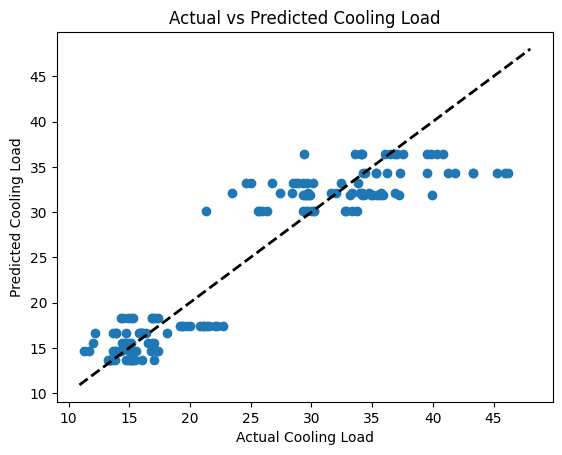

In [ ]:
# Let's visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs Predicted Cooling Load")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()
# Ah... polyminial regression would have worked better


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

#90% accuracy. Nice!

Mean Squared Error: 8.966486379392284
R^2 Score: 0.9032295082009303


In [18]:
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 13.867868415708685
R^2 Score: 0.8503315133699147


In [20]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 12.872978861785494
R^2 Score: 0.8610688242122282


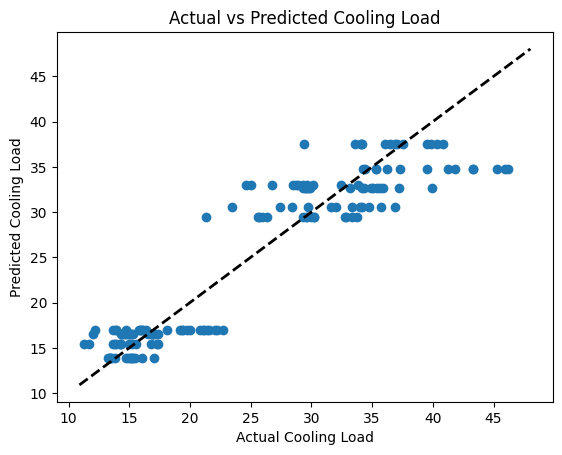

In [22]:
# Let's visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs Predicted Cooling Load")
#How to take the polynomial line?
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()